In [4054]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline,Pipeline
from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,auc,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import statsmodels.formula.api as  sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


#feature Selection

from sklearn.feature_selection import SelectKBest,chi2,RFE


#models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4055]:
data=pd.read_csv('Human_Resources.csv')

In [4056]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Checking for Outliers

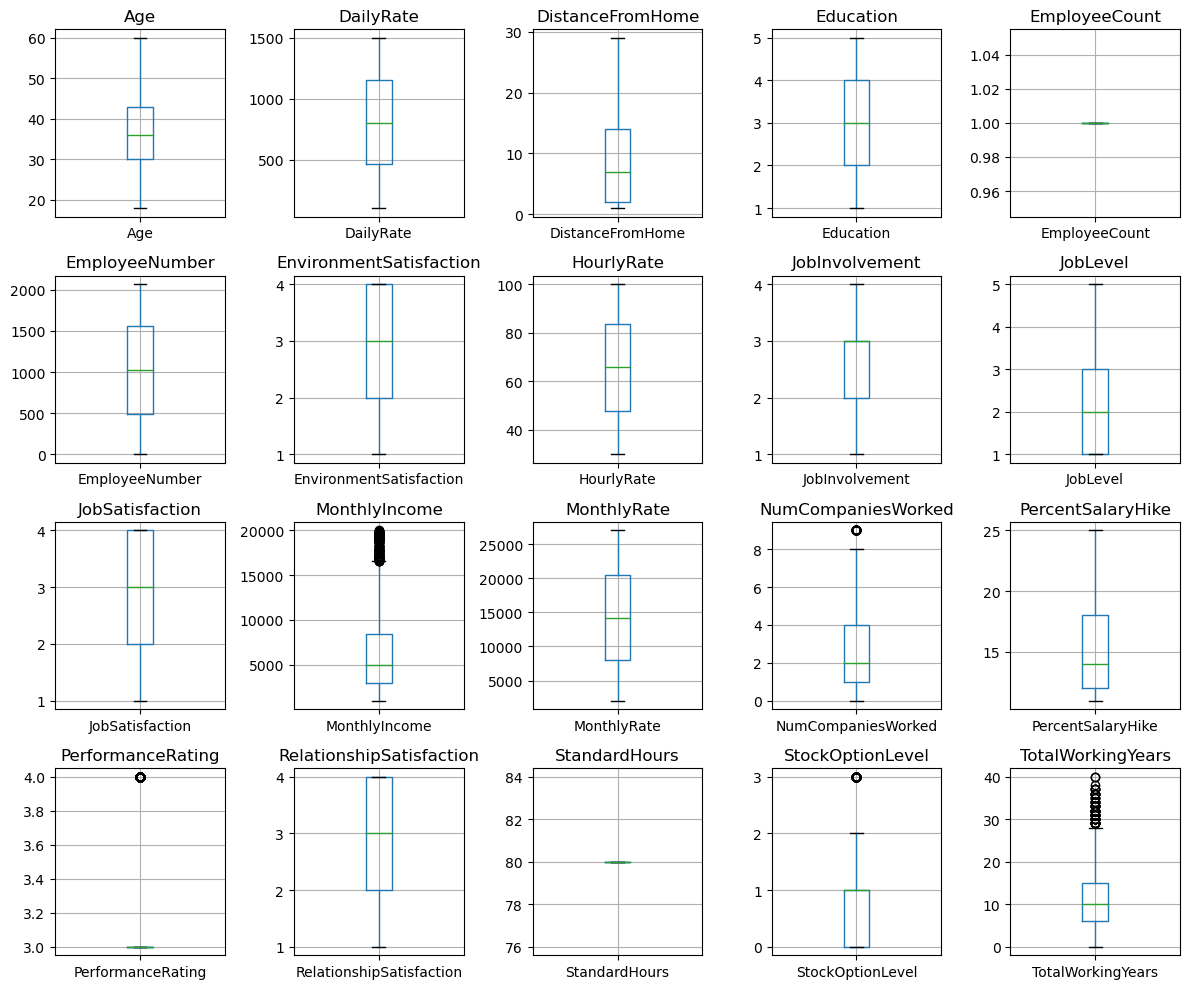

In [4057]:

num_subplots = min(20, len(data.columns)) 

num_rows = (num_subplots + 4) // 5  
num_cols = (num_subplots + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10))


axes = axes.flatten()

for i, column in enumerate(data.select_dtypes(exclude='object')):
    if i < num_subplots:
        data.boxplot(column=column, ax=axes[i])
        axes[i].set_title(column)


for i in range(num_subplots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [4058]:
out_list=['MonthlyIncome','PerformanceRating','StockOptionLevel','TotalWorkingYears','NumCompaniesWorked']

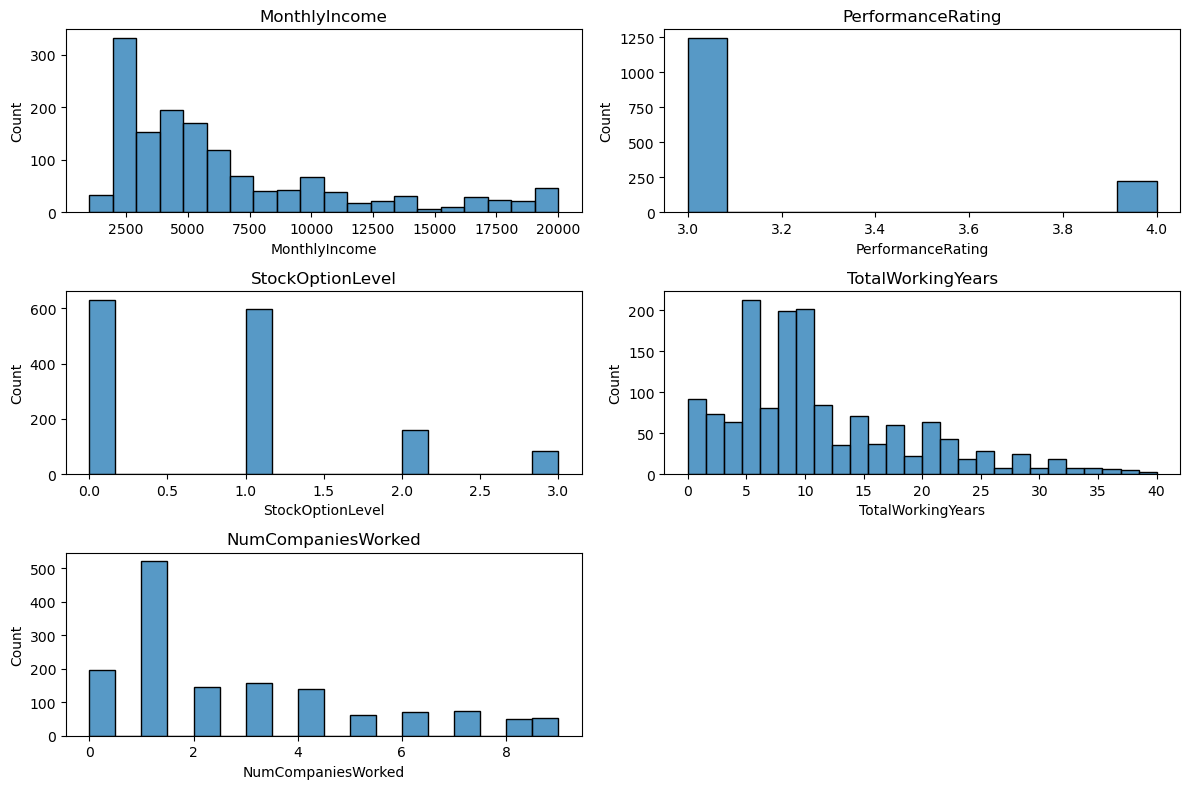

In [4059]:
num_subplots = len(out_list)
num_rows = (num_subplots + 1) // 2  # 2 subplots per row
num_cols = (num_subplots + num_rows - 1) // num_rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

axes = axes.flatten()

for i, column in enumerate(out_list):
    sns.histplot(data, x=column, ax=axes[i])
    axes[i].set_title(column)

for i in range(num_subplots, num_rows * num_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

C:\Users\ISF\AppData\Local\Temp\ipykernel_18196\1627842713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyIncome'])
C:\Users\ISF\AppData\Local\Temp\ipykernel_18196\1627842713.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['TotalWorkingYears'])
C:\Users\ISF\AppData\Loc

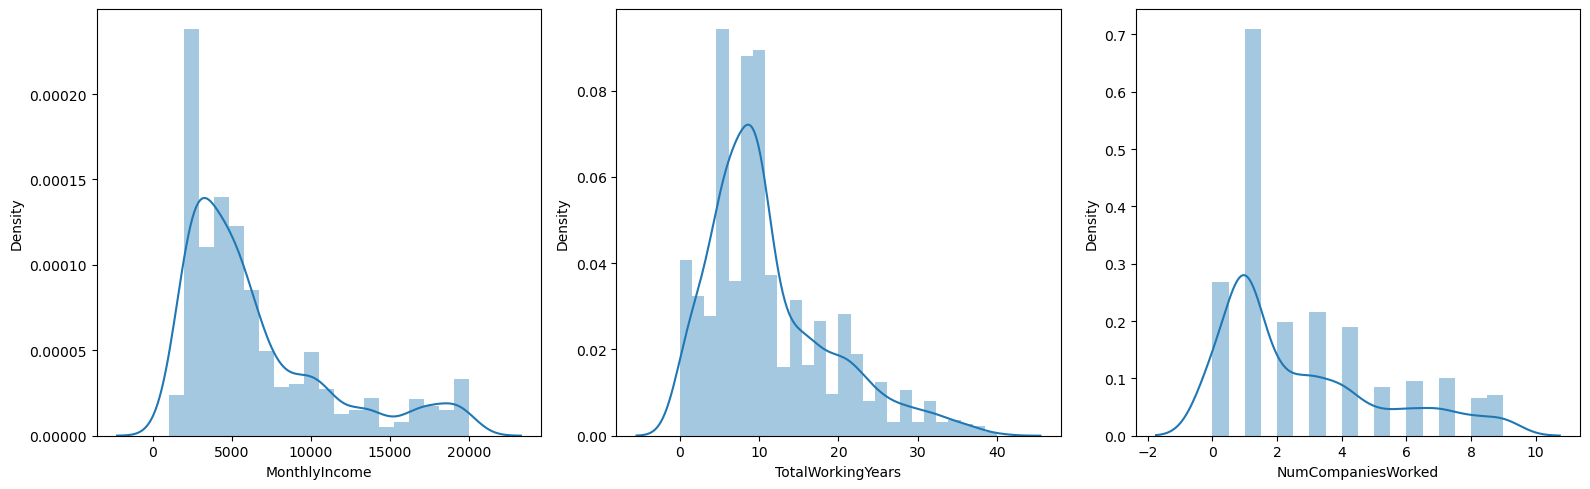

In [4060]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.distplot(data['MonthlyIncome'])

plt.subplot(1,3,2)
sns.distplot(data['TotalWorkingYears'])

plt.subplot(1,3,3)
sns.distplot(data['NumCompaniesWorked'])

plt.tight_layout()

plt.show()

## Lets try to trimm the outliers

In [4061]:
def iqr(column_name):
    percent_25 = data[column_name].quantile(0.25)
    percent_75 = data[column_name].quantile(0.75)
    iqr = percent_75 - percent_25
    upper_level = percent_75 + 1.5 * iqr
    lower_level = percent_25 + 1.5 * iqr
    
    return upper_level,lower_level

In [4062]:
up,low=iqr('MonthlyIncome')

In [4063]:
print(f'Upper limit :{up}')
print(f'Lower limit :{low}')

Upper limit :16581.0
Lower limit :11113.0


In [4064]:
data[data['MonthlyIncome']<up]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4065]:
data[data['MonthlyIncome']>low]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
18,53,No,Travel_Rarely,1219,Sales,2,4,Life Sciences,1,23,...,3,80,0,31,3,3,25,8,3,7
22,34,No,Travel_Rarely,419,Research & Development,7,4,Life Sciences,1,28,...,3,80,0,13,4,3,12,6,2,11
25,53,No,Travel_Rarely,1282,Research & Development,5,3,Other,1,32,...,4,80,1,26,3,2,14,13,4,8
29,46,No,Travel_Rarely,705,Sales,2,4,Marketing,1,38,...,4,80,0,22,2,2,2,2,2,1
45,41,Yes,Travel_Rarely,1360,Research & Development,12,3,Technical Degree,1,58,...,4,80,0,23,0,3,22,15,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,37,No,Travel_Rarely,161,Research & Development,10,3,Life Sciences,1,2017,...,1,80,1,16,2,3,16,11,6,8
1437,39,No,Non-Travel,105,Research & Development,9,3,Life Sciences,1,2022,...,3,80,0,21,3,2,6,0,1,3
1443,42,No,Travel_Rarely,300,Research & Development,2,3,Life Sciences,1,2031,...,1,80,0,24,2,2,22,6,4,14
1445,41,No,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,...,3,80,1,21,3,3,20,7,0,10


In [4066]:
# up,low=iqr('TotalWorkingYears')

In [4067]:
# data[data['TotalWorkingYears']<up]

In [4068]:
# data=data[data['TotalWorkingYears']>up]

## Trying Logrithmic technique

In [4069]:
data['MonthlyIncome']=np.log(data['MonthlyIncome'])

C:\Users\ISF\AppData\Local\Temp\ipykernel_18196\958409668.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MonthlyIncome'])


<Axes: xlabel='MonthlyIncome', ylabel='Density'>

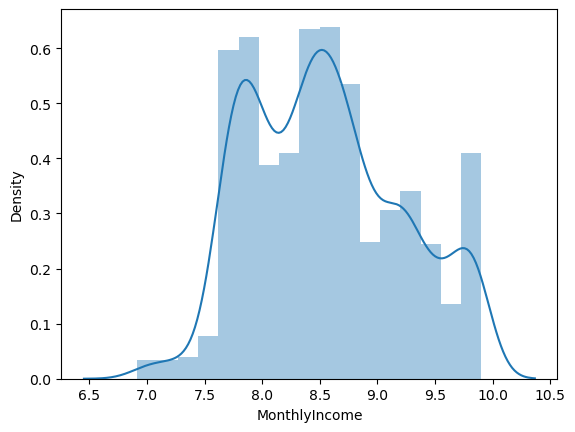

In [4070]:
sns.distplot(data['MonthlyIncome'])

<Axes: >

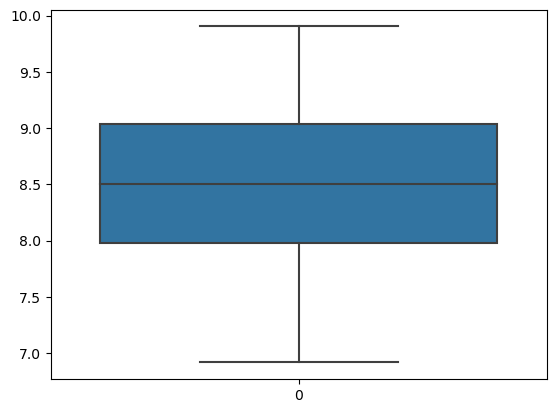

In [4071]:
sns.boxplot(data['MonthlyIncome'])

In [4072]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## Now Lets find Multicolinearity

In [4073]:
corr=data.corr()

<Axes: >

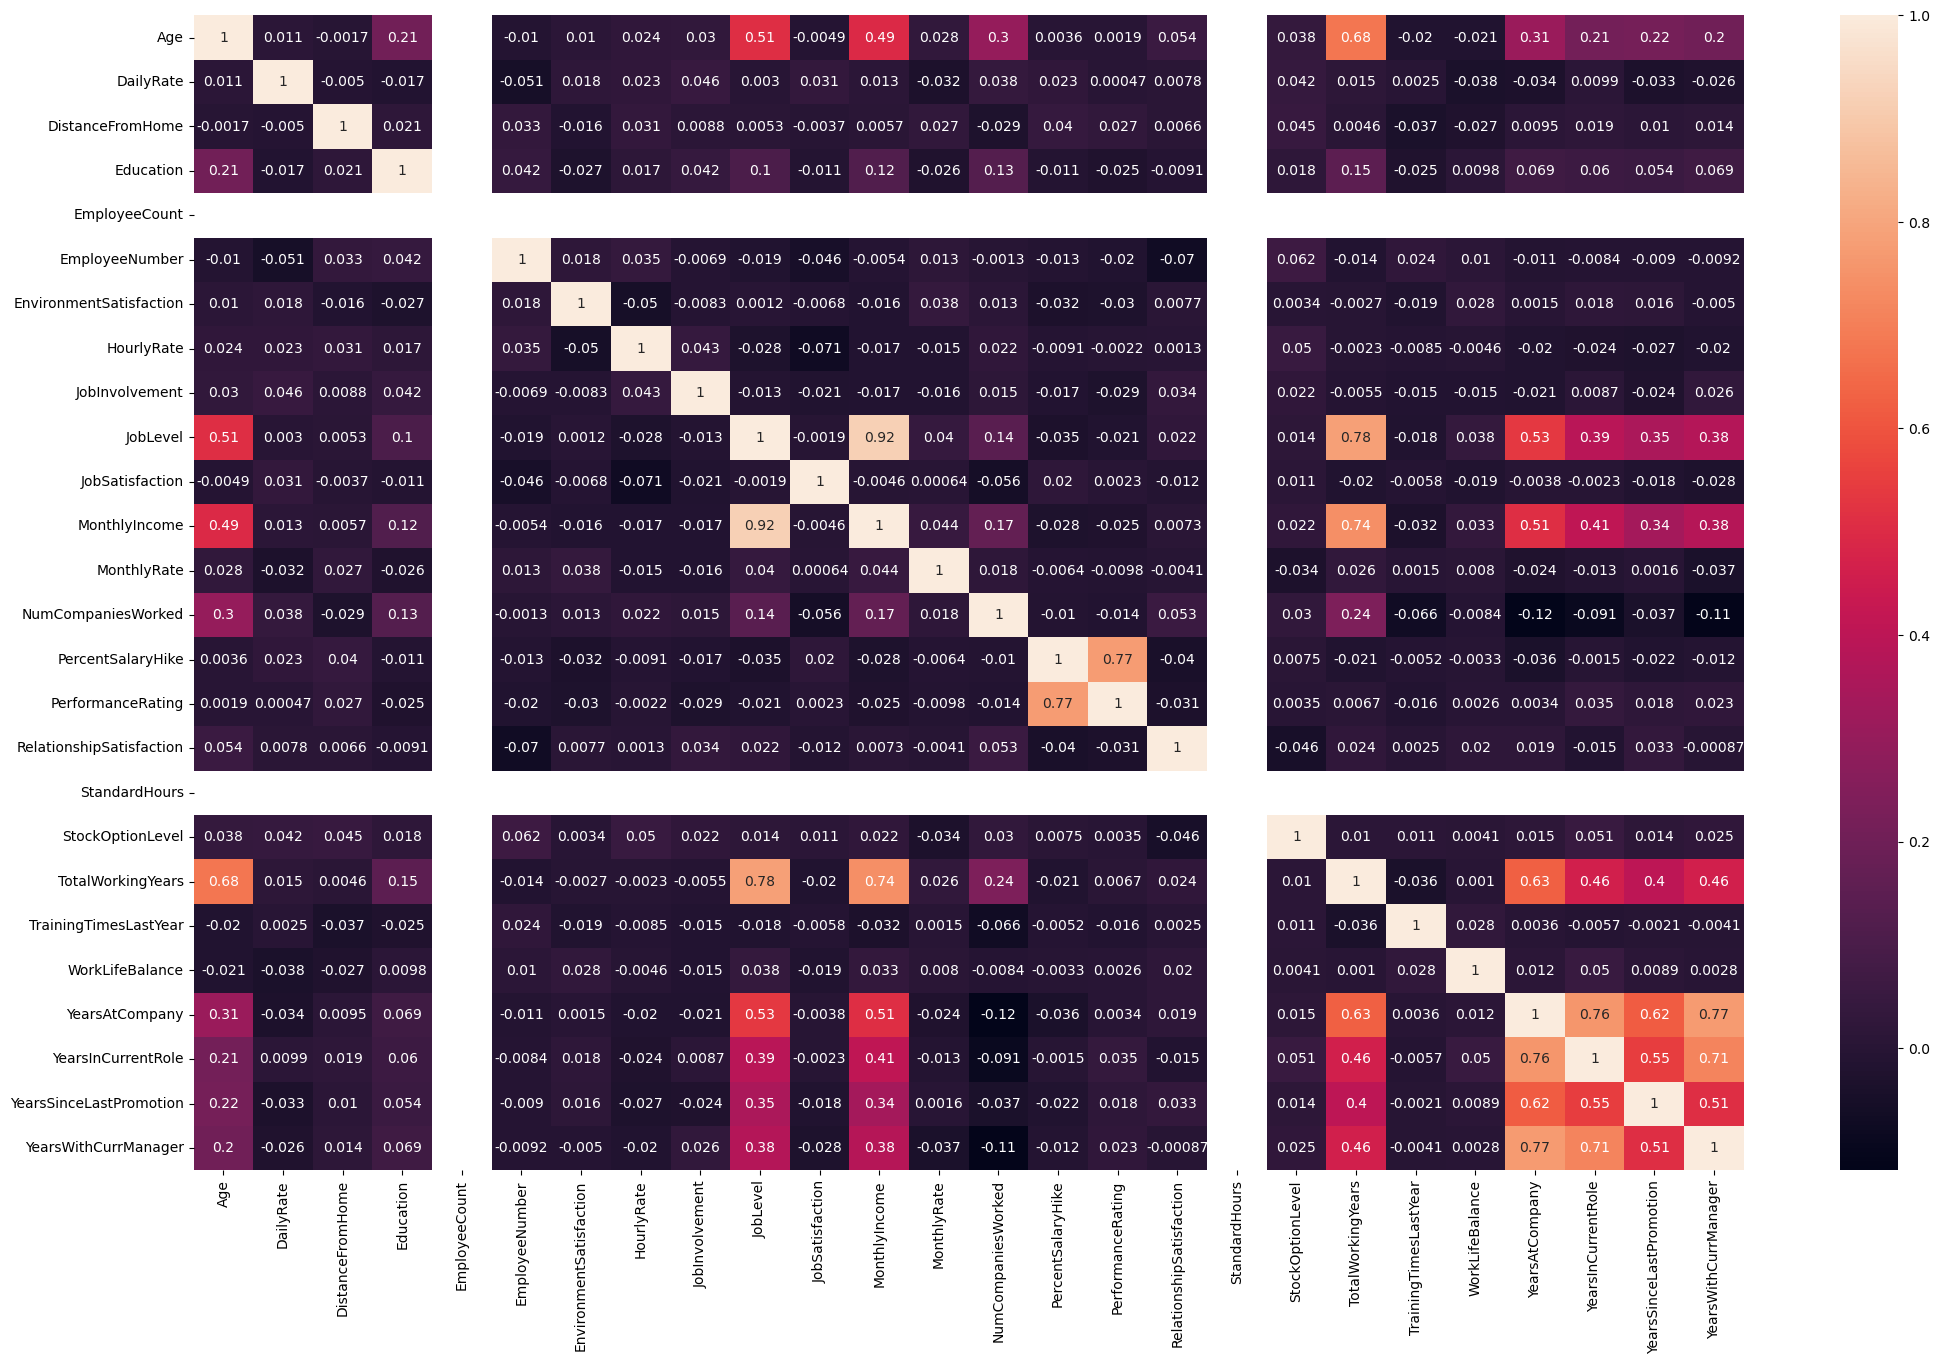

In [4074]:
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)

In [4075]:
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4076]:
# TotalWorkingYears ~ Age = 68
# TotalWorkingYears ~ JobLevel = 78
# MonthlyIncome ~ JObLevel = 68
# TotalWorkingYears ~ MonthlyIncome = 74
# PercentSalaryHike ~ PerformanceRating = 77
# YearsAtCompany ~ TotalWorkingYears = 63
# YearsWithCurrManager ~ YearsAtCompany = 77
# YearsSinceLastPromotion ~ YearsAtCompany = 62
# YearsInCurrentRole ~ YearsAtCompany = 75
# YearsInCurrentRole ~ YearsWithCurrManager = 71

## Using LableEncoder to replace the number values to categorical values

In [4077]:
x=data.drop('Attrition',axis=1)
y=data['Attrition']

In [4078]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.85,random_state=42)

In [4079]:
x_train.shape,y_train.shape

((1249, 34), (1249,))

In [4080]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
479,24,Travel_Frequently,1287,Research & Development,7,3,Life Sciences,1,647,1,...,4,80,1,6,4,3,6,3,1,2
275,37,Non-Travel,728,Research & Development,1,4,Medical,1,380,1,...,1,80,2,15,2,3,5,2,0,2
1057,29,Travel_Frequently,115,Sales,13,3,Technical Degree,1,1487,1,...,1,80,0,7,4,1,5,3,0,0
1418,38,Travel_Frequently,508,Research & Development,6,4,Life Sciences,1,1997,1,...,4,80,1,10,1,3,8,3,7,7
889,27,Travel_Rarely,1103,Research & Development,14,3,Life Sciences,1,1244,1,...,4,80,2,9,3,2,9,7,6,8


In [4081]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
479,24,Travel_Frequently,1287,Research & Development,7,3,Life Sciences,1,647,1,...,4,80,1,6,4,3,6,3,1,2
275,37,Non-Travel,728,Research & Development,1,4,Medical,1,380,1,...,1,80,2,15,2,3,5,2,0,2
1057,29,Travel_Frequently,115,Sales,13,3,Technical Degree,1,1487,1,...,1,80,0,7,4,1,5,3,0,0
1418,38,Travel_Frequently,508,Research & Development,6,4,Life Sciences,1,1997,1,...,4,80,1,10,1,3,8,3,7,7
889,27,Travel_Rarely,1103,Research & Development,14,3,Life Sciences,1,1244,1,...,4,80,2,9,3,2,9,7,6,8


In [4082]:
# # plt.subplots()
# for i in x_train.columns:
#     plt.subplots()
#     a=x_train[i].value_counts()
#     sns.histplot(a)
#     plt.title(i)


In [4083]:
x_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4084]:
x_train['WorkLifeBalance'].value_counts()

3    763
2    298
4    122
1     66
Name: WorkLifeBalance, dtype: int64

In [4085]:
# Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,
# JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance


In [4086]:
# x_train['Education']=x_train['Education'].to_string()

In [4087]:
def convert_string(data):
    data['Education']=data['Education'].map({1:'A',2:'B',3:'C',4:'D',5:'E'})
    data['EnvironmentSatisfaction']=data['EnvironmentSatisfaction'].map({1:'A',2:'B',3:'C',4:'D'})
    data['JobInvolvement']=data['JobInvolvement'].map({1:'A',2:'B',3:'C',4:'D'})
    data['JobLevel']=data['JobLevel'].map({1:'A',2:'B',3:'C',4:'D',5:'E'})
    data['JobSatisfaction']=data['JobSatisfaction'].map({1:'A',2:'B',3:'C',4:'D'})
    data['RelationshipSatisfaction']=data['RelationshipSatisfaction'].map({1:'A',2:'B',3:'C',4:'D'})
    data['StockOptionLevel']=data['StockOptionLevel'].map({1:'A',2:'B',3:'C'})
    data['WorkLifeBalance']=data['WorkLifeBalance'].map({1:'A',2:'B',3:'C',4:'D'})

    

In [4088]:
convert_string(x_train)
convert_string(x_test)

In [4089]:
x_train.info(),x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 479 to 1126
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1249 non-null   int64  
 1   BusinessTravel            1249 non-null   object 
 2   DailyRate                 1249 non-null   int64  
 3   Department                1249 non-null   object 
 4   DistanceFromHome          1249 non-null   int64  
 5   Education                 1249 non-null   object 
 6   EducationField            1249 non-null   object 
 7   EmployeeCount             1249 non-null   int64  
 8   EmployeeNumber            1249 non-null   int64  
 9   EnvironmentSatisfaction   1249 non-null   object 
 10  Gender                    1249 non-null   object 
 11  HourlyRate                1249 non-null   int64  
 12  JobInvolvement            1249 non-null   object 
 13  JobLevel                  1249 non-null   object 
 14  JobRol

(None, None)

In [4090]:
# x_train.select_dtypes(include='object')

In [4091]:
x_train.shape,y_train.shape

((1249, 34), (1249,))

# Feature Selection

In [4092]:
#with all feature without drop first from get_dummies it is giving ROC_Area = 0.81

In [4093]:
x=x_train
y=y_train

In [4094]:
x_dum=pd.get_dummies(x)

In [4095]:
x_dum

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,...,RelationshipSatisfaction_B,RelationshipSatisfaction_C,RelationshipSatisfaction_D,StockOptionLevel_A,StockOptionLevel_B,StockOptionLevel_C,WorkLifeBalance_A,WorkLifeBalance_B,WorkLifeBalance_C,WorkLifeBalance_D
479,24,1287,7,1,647,55,7.967627,14168,1,16,...,0,0,1,1,0,0,0,0,1,0
275,37,728,1,1,380,80,9.518046,11677,2,18,...,0,0,0,0,1,0,0,0,1,0
1057,29,115,13,1,1487,51,8.659560,17485,5,11,...,0,0,0,0,0,0,1,0,0,0
1418,38,508,6,1,1997,72,8.579417,14284,2,11,...,0,0,1,1,0,0,0,0,1,0
889,27,1103,14,1,1244,42,7.711997,14377,1,14,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,1,1596,46,8.133587,25348,1,17,...,0,0,1,0,1,0,0,1,0,0
1294,41,447,5,1,1814,85,8.834919,15530,3,12,...,0,0,0,0,0,0,1,0,0,0
860,22,1256,3,1,1203,48,7.956126,4223,0,11,...,1,0,0,1,0,0,0,0,1,0
1459,29,1378,13,1,2053,46,8.300280,23679,4,13,...,0,0,0,1,0,0,0,0,1,0


### Univariate Feature Selection (SelectKBest with chi-squared test):

#### Best 10 

In [4096]:
select_k_10=SelectKBest(score_func=chi2,k=10)

In [4097]:
k_best=select_k_10.fit_transform(x_dum,y)

In [4098]:
select_k_10.get_support(indices=True)

array([ 0,  1,  4,  7, 12, 14, 15, 17, 45, 68], dtype=int64)

In [4099]:
select_k_10=select_k_10.get_support(indices=True).tolist()

In [4100]:
columns_select_k_10=x_dum.columns[select_k_10]

In [4101]:
x_dum_10=x_dum[columns_select_k_10]

In [4102]:
# x=x_dum_10 # ROC_Area = 0.71

#### Best 20

In [4103]:
select_k_20=SelectKBest(score_func=chi2,k=20)

In [4104]:
k_best=select_k_20.fit_transform(x_dum,y)

In [4105]:
select_k_20.get_support(indices=True).tolist()

[0, 1, 2, 4, 7, 12, 14, 15, 17, 19, 41, 45, 46, 50, 52, 58, 65, 67, 68, 73]

In [4106]:
select_k_20=select_k_20.get_support(indices=True).tolist()

In [4107]:
columns_select_k_20=x_dum.columns[select_k_20]

In [4108]:
x_dum_20=x_dum[columns_select_k_20]

In [4109]:
# x=x_dum_20 # ROC_Area = 0.76

#### Best 30

In [4110]:
select_k_30=SelectKBest(score_func=chi2,k=30)

In [4111]:
k_best=select_k_30.fit_transform(x_dum,y)

In [4112]:
select_k_30.get_support(indices=True)

array([ 0,  1,  2,  4,  7,  8, 12, 14, 15, 17, 19, 35, 41, 45, 46, 48, 50,
       52, 53, 54, 55, 58, 59, 63, 65, 67, 68, 73, 74, 76], dtype=int64)

In [4113]:
select_k_30=select_k_30.get_support(indices=True).tolist()

In [4114]:
columns_select_k_30=x_dum.columns[select_k_30]

In [4115]:
x_dum_30=x_dum[columns_select_k_30]

In [4116]:
# x=x_dum_30 # ROC_Area = 0.80

#### Best 48

In [4117]:
select_k_48=SelectKBest(score_func=chi2,k=48) #48

In [4118]:
k_best=select_k_48.fit_transform(x_dum,y)

In [4119]:
select_k_48.get_support(indices=True)

array([ 0,  1,  2,  4,  6,  7,  8, 12, 13, 14, 15, 16, 17, 18, 19, 22, 23,
       28, 29, 31, 32, 34, 35, 37, 41, 44, 45, 46, 48, 49, 50, 51, 52, 53,
       54, 55, 58, 59, 62, 63, 64, 65, 67, 68, 73, 74, 76, 78],
      dtype=int64)

In [4120]:
select_k_48=select_k_48.get_support(indices=True).tolist()

In [4121]:
columns_select_k_48=x_dum.columns[select_k_48]

In [4122]:
x_dum_48=x_dum[columns_select_k_48]

In [4123]:
# x=x_dum_48 # ROC_Area = 0.81

In [4124]:
x_dum.shape

(1249, 80)

## Feature Importance from Trees (Random Forest)

In [4125]:
random=RandomForestClassifier()

In [4126]:
random_select=random.fit(x_dum,y)

In [4127]:
random_select_pd=pd.DataFrame(random_select.feature_importances_).T

In [4128]:
random_select_pd.columns.shape,x_dum.columns.shape

((80,), (80,))

In [4129]:
random_select_pd.columns=x_dum.columns

In [4130]:
random_select_pd.T

# 'EmployeeCount','StandardHours','JobRole_Research Director','Over18_Y'

,0
Age,0.053291
DailyRate,0.043647
DistanceFromHome,0.033662
EmployeeCount,0.000000
EmployeeNumber,0.037564
...,...
StockOptionLevel_C,0.003877
WorkLifeBalance_A,0.007188
WorkLifeBalance_B,0.007202
WorkLifeBalance_C,0.009810


In [4131]:
# random_select_droped=random_select.drop(columns=['EducationField_Human Resources','JobRole_Manager','JobRole_Research Director'])

In [4132]:
random_select_droped=random_select_pd.drop(columns=['EmployeeCount','StandardHours','JobRole_Research Director','Over18_Y','JobRole_Manager'])

In [4133]:
random_select_45=x_dum[random_select_droped.columns.to_list()]

In [4134]:
random_select_45

,Age,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,RelationshipSatisfaction_B,RelationshipSatisfaction_C,RelationshipSatisfaction_D,StockOptionLevel_A,StockOptionLevel_B,StockOptionLevel_C,WorkLifeBalance_A,WorkLifeBalance_B,WorkLifeBalance_C,WorkLifeBalance_D
479,24,1287,7,647,55,7.967627,14168,1,16,3,...,0,0,1,1,0,0,0,0,1,0
275,37,728,1,380,80,9.518046,11677,2,18,3,...,0,0,0,0,1,0,0,0,1,0
1057,29,115,13,1487,51,8.659560,17485,5,11,3,...,0,0,0,0,0,0,1,0,0,0
1418,38,508,6,1997,72,8.579417,14284,2,11,3,...,0,0,1,1,0,0,0,0,1,0
889,27,1103,14,1244,42,7.711997,14377,1,14,3,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,750,28,1596,46,8.133587,25348,1,17,3,...,0,0,1,0,1,0,0,1,0,0
1294,41,447,5,1814,85,8.834919,15530,3,12,3,...,0,0,0,0,0,0,1,0,0,0
860,22,1256,3,1203,48,7.956126,4223,0,11,3,...,1,0,0,1,0,0,0,0,1,0
1459,29,1378,13,2053,46,8.300280,23679,4,13,3,...,0,0,0,1,0,0,0,0,1,0


In [4135]:
# x=random_select_45

In [4136]:
random_select_45.shape,y.shape

((1249, 75), (1249,))

In [4137]:
important_feature=pd.DataFrame({'Feature':x_dum.columns,
                               'Importance':random_select.feature_importances_})

In [4138]:
important_feature=important_feature.sort_values('Importance',ascending=False)

Text(0, 0.5, 'feature')

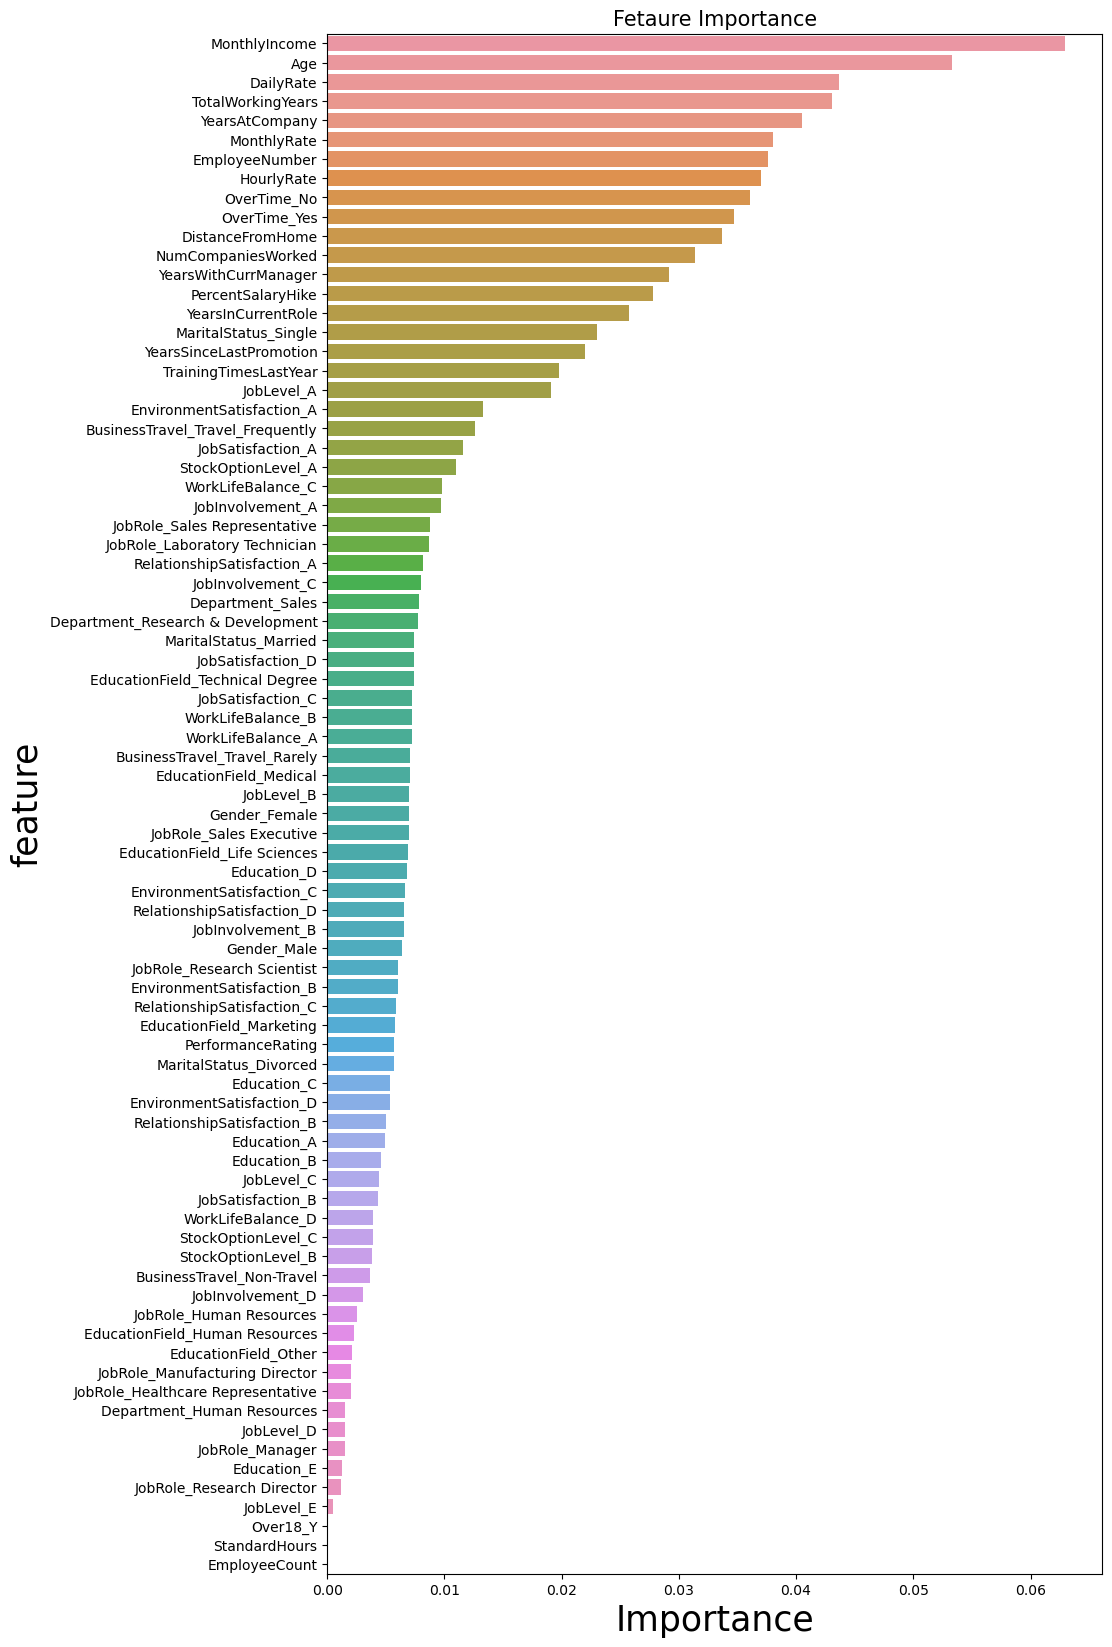

In [4139]:
plt.figure(figsize=(10,20))
sns.barplot(x='Importance',y='Feature',data=important_feature,)
plt.title('Fetaure Importance', fontsize=15)
plt.xlabel('Importance', fontsize=25)
plt.ylabel('feature', fontsize=25)

In [4140]:
important_feature[important_feature['Importance']<0.000933]
# important_feature['Importance'].sort_values().head(10)

,Feature,Importance
49,JobLevel_E,0.000523
66,Over18_Y,0.000000
11,StandardHours,0.000000
3,EmployeeCount,0.000000


In [4141]:
random_selected_48=important_feature[important_feature['Importance']>0.000933]

In [4142]:
index_list=random_selected_48.index.to_list()

In [4143]:
x=x_dum.iloc[:,index_list]

In [4144]:
x #default good

,MonthlyIncome,Age,DailyRate,TotalWorkingYears,YearsAtCompany,MonthlyRate,EmployeeNumber,HourlyRate,OverTime_No,OverTime_Yes,...,JobRole_Human Resources,EducationField_Human Resources,EducationField_Other,JobRole_Manufacturing Director,JobRole_Healthcare Representative,Department_Human Resources,JobLevel_D,JobRole_Manager,Education_E,JobRole_Research Director
479,7.967627,24,1287,6,6,14168,647,55,0,1,...,0,0,0,0,0,0,0,0,0,0
275,9.518046,37,728,15,5,11677,380,80,0,1,...,0,0,0,0,0,0,0,0,0,1
1057,8.659560,29,115,7,5,17485,1487,51,1,0,...,0,0,0,0,0,0,0,0,0,0
1418,8.579417,38,508,10,8,14284,1997,72,1,0,...,0,0,0,1,0,0,0,0,0,0
889,7.711997,27,1103,9,9,14377,1244,42,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,8.133587,35,750,10,10,25348,1596,46,1,0,...,0,0,0,0,0,0,0,0,0,0
1294,8.834919,41,447,11,3,15530,1814,85,1,0,...,0,0,0,0,1,0,0,0,0,0
860,7.956126,22,1256,1,0,4223,1203,48,0,1,...,0,0,0,0,0,0,0,0,0,0
1459,8.300280,29,1378,10,4,23679,2053,46,0,1,...,0,0,1,0,0,0,0,0,0,0


## Recursive Feature Elimination (RFE) with Cross-Validation:

In [4145]:
logi=LogisticRegression(max_iter=9000)
# logi.fit(random_select_45,y)

In [4146]:
logi_rfe=RFE(logi,n_features_to_select=45)

In [4147]:
logi_rfe_select=logi_rfe.fit_transform(x_dum_48,y)

In [4148]:
list_select=logi_rfe.get_support(indices=True).tolist()

In [4149]:
logi_select=x_dum.iloc[:,list_select]

In [4150]:
# x=logi_select

In [4151]:
# data.drop(labels=['Over18'],axis=1,inplace=True)

In [4152]:
# x=data.drop('Attrition',axis=1)
# y=data.loc[:,['Attrition']]

In [4153]:
# x=x.drop(labels=['BusinessTravel','EmployeeCount','DailyRate','MonthlyRate','PerformanceRating','Over18','YearsWithCurrManager','PerformanceRating'],axis=1)

In [4154]:
x.shape,y.shape

((1249, 76), (1249,))

In [4155]:
smt=SMOTE()
# x,y=smt.fit_resample(x,y)

## Applying OneHotEncoder

In [4156]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 479 to 1126
Data columns (total 76 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MonthlyIncome                      1249 non-null   float64
 1   Age                                1249 non-null   int64  
 2   DailyRate                          1249 non-null   int64  
 3   TotalWorkingYears                  1249 non-null   int64  
 4   YearsAtCompany                     1249 non-null   int64  
 5   MonthlyRate                        1249 non-null   int64  
 6   EmployeeNumber                     1249 non-null   int64  
 7   HourlyRate                         1249 non-null   int64  
 8   OverTime_No                        1249 non-null   uint8  
 9   OverTime_Yes                       1249 non-null   uint8  
 10  DistanceFromHome                   1249 non-null   int64  
 11  NumCompaniesWorked                 1249 non-null   int

In [4157]:
ohe=OneHotEncoder(sparse=False)

In [4158]:
cat_val=x.select_dtypes(include='uint8')
cat_val_encode=ohe.fit_transform(cat_val)

In [4159]:
cat_val

,OverTime_No,OverTime_Yes,MaritalStatus_Single,JobLevel_A,EnvironmentSatisfaction_A,BusinessTravel_Travel_Frequently,JobSatisfaction_A,StockOptionLevel_A,WorkLifeBalance_C,JobInvolvement_A,...,JobRole_Human Resources,EducationField_Human Resources,EducationField_Other,JobRole_Manufacturing Director,JobRole_Healthcare Representative,Department_Human Resources,JobLevel_D,JobRole_Manager,Education_E,JobRole_Research Director
479,0,1,0,1,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
275,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1057,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1418,1,0,0,0,1,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
889,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1294,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
860,0,1,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1459,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


In [4160]:
cat_df=pd.DataFrame(cat_val_encode)

In [4161]:
cat_df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1245,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1246,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1247,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4162]:
num_val=x.select_dtypes(exclude='object')

In [4163]:
num_val

,MonthlyIncome,Age,DailyRate,TotalWorkingYears,YearsAtCompany,MonthlyRate,EmployeeNumber,HourlyRate,OverTime_No,OverTime_Yes,...,JobRole_Human Resources,EducationField_Human Resources,EducationField_Other,JobRole_Manufacturing Director,JobRole_Healthcare Representative,Department_Human Resources,JobLevel_D,JobRole_Manager,Education_E,JobRole_Research Director
479,7.967627,24,1287,6,6,14168,647,55,0,1,...,0,0,0,0,0,0,0,0,0,0
275,9.518046,37,728,15,5,11677,380,80,0,1,...,0,0,0,0,0,0,0,0,0,1
1057,8.659560,29,115,7,5,17485,1487,51,1,0,...,0,0,0,0,0,0,0,0,0,0
1418,8.579417,38,508,10,8,14284,1997,72,1,0,...,0,0,0,1,0,0,0,0,0,0
889,7.711997,27,1103,9,9,14377,1244,42,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,8.133587,35,750,10,10,25348,1596,46,1,0,...,0,0,0,0,0,0,0,0,0,0
1294,8.834919,41,447,11,3,15530,1814,85,1,0,...,0,0,0,0,1,0,0,0,0,0
860,7.956126,22,1256,1,0,4223,1203,48,0,1,...,0,0,0,0,0,0,0,0,0,0
1459,8.300280,29,1378,10,4,23679,2053,46,0,1,...,0,0,1,0,0,0,0,0,0,0


In [4164]:
# x_all=pd.concat([num_val,cat_df],axis=)

In [4165]:
x_all=np.hstack([num_val,cat_df])

In [4166]:
# x_all.columns=[str(col) for col in x_all.columns]

In [4167]:
x_all

array([[7.96762674e+00, 2.40000000e+01, 1.28700000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.51804564e+00, 3.70000000e+01, 7.28000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [8.65956043e+00, 2.90000000e+01, 1.15000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [7.95612635e+00, 2.20000000e+01, 1.25600000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.30028019e+00, 2.90000000e+01, 1.37800000e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.86946530e+00, 5.00000000e+01, 2.64000000e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## Applying Label Encoder on y

In [4168]:
x_all.shape

(1249, 196)

In [4169]:
le=LabelEncoder()
y_labled=le.fit_transform(y)

In [4170]:
y=pd.DataFrame(y_labled)

In [4171]:
y

,0
0,1
1,0
2,1
3,0
4,0
...,...
1244,0
1245,0
1246,1
1247,0


## Splitting Validation 

In [4172]:
x_all,x_val,y,y_val=train_test_split(x_all,y,train_size=.80,random_state=21)

In [4173]:
# x_all,y=smt.fit_resample(x_all,y)

In [4174]:
y.value_counts()

0    834
1    165
dtype: int64

## Applying MinMaxScaler to scale the data

In [4175]:
scaler=StandardScaler()

In [4176]:
x_scaled=scaler.fit_transform(x_all)

In [4177]:
x_scaled.shape,y.shape

((999, 196), (999, 1))

In [4178]:
x_val=scaler.fit_transform(x_val)

In [4179]:
# x_scaled,y=smt.fit_resample(x_scaled,y)

## Splitting the data into Train and Test

In [4180]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,train_size=.80,random_state=32)

In [4181]:
y_train.value_counts()

0    671
1    128
dtype: int64

## using SMOTE / RandomOverSampling

In [4182]:
smt=SMOTE()
ros=RandomOverSampler()

In [4183]:
x_train_sm,y_train_sm=smt.fit_resample(x_train,y_train)
# x_train_sm,y_train_sm=x_train,y_train

In [4184]:
y_train_sm.value_counts()

0    671
1    671
dtype: int64

## Tryng Using PCA

In [4185]:
pca=PCA(n_components=10)
tsne=TSNE()

In [4186]:
# x_train_sm=pca.fit_transform(x_train_sm)

In [4187]:
# x_test=pca.fit_transform(x_test)

In [4188]:
# x_val=pca.fit_transform(x_val)

In [4189]:
x_train_sm

array([[-0.9532232 , -0.28913782,  1.48395862, ...,  5.32750907,
         0.24826711, -0.24826711],
       [ 0.09442293,  2.58058543,  0.94401409, ..., -0.18770498,
         0.24826711, -0.24826711],
       [ 1.13705211,  0.70422792,  0.70376355, ..., -0.18770498,
         0.24826711, -0.24826711],
       ...,
       [-0.83714614, -1.55942873,  0.97790178, ..., -0.18770498,
         0.24826711, -0.24826711],
       [ 0.36331829,  1.13452055, -0.16802322, ..., -0.18770498,
         0.24826711, -0.24826711],
       [-1.00763971, -0.95047908,  0.51384231, ..., -0.18770498,
         0.24826711, -0.24826711]])

In [4190]:
def get_train_report(model):
    pred=model.predict(x_train_sm)
    class_report=classification_report(pred,y_train_sm)
    return class_report

In [4191]:
def get_test_report(model):
    pred=model.predict(x_test)
    class_report=classification_report(pred,y_test)
    confusion=confusion_matrix(pred,y_test)
    return class_report,confusion

In [4192]:
def fpr_tpr(model):
    proba=model.predict_proba(x_test)[:,1]
    fpr,tpr,treshold=roc_curve(y_test,y_proba)
    auc_score=auc(fpr,tpr)
    return fpr,tpr,auc_score

## not good result with pca for now

In [4193]:
logi=LogisticRegression()
k_fold=KFold(n_splits=10,shuffle=True)
param={'penalty':['l2','l1'],'C':[1.0,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]}
logi_grid=GridSearchCV(logi,param_grid=param,cv=k_fold)
logi_grid.fit(x_train_sm,y_train_sm)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
                               2.0],
                         'penalty': ['l2', 'l1']})

In [4194]:
logi_grid.best_params_,logi_grid.best_score_

({'C': 1.6, 'penalty': 'l2'}, 0.8367716970702045)

In [4195]:
y_pred=logi_grid.predict(x_test)

In [4196]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       163
           1       0.52      0.73      0.61        37

    accuracy                           0.82       200
   macro avg       0.73      0.79      0.75       200
weighted avg       0.86      0.82      0.84       200



In [4197]:
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

array([[138,  25],
       [ 10,  27]], dtype=int64)

<Axes: >

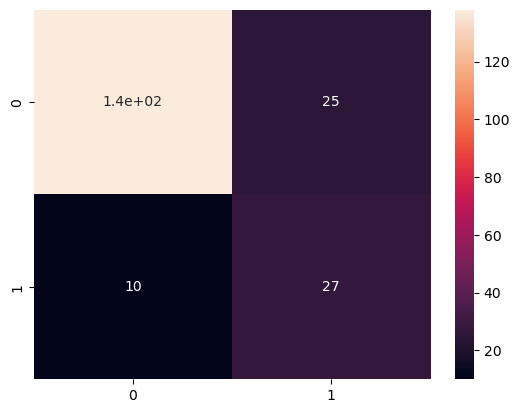

In [4198]:
sns.heatmap(c_matrix,annot=True)

In [4199]:
# fpr,tpr,thre=fpr_tpr(logi_grid)

In [4200]:
# auc_score=auc(fpr,tpr)

In [4201]:
# plt.figure()
# plt.plot(fpr,tpr,color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

## Validation Test

In [4202]:
y_pred=logi_grid.predict(x_val)

In [4203]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       209
           1       0.42      0.68      0.52        41

    accuracy                           0.79       250
   macro avg       0.67      0.75      0.69       250
weighted avg       0.85      0.79      0.81       250



In [4204]:
c_matrix=confusion_matrix(y_val,y_pred)

In [4205]:
c_matrix

array([[170,  39],
       [ 13,  28]], dtype=int64)

<Axes: >

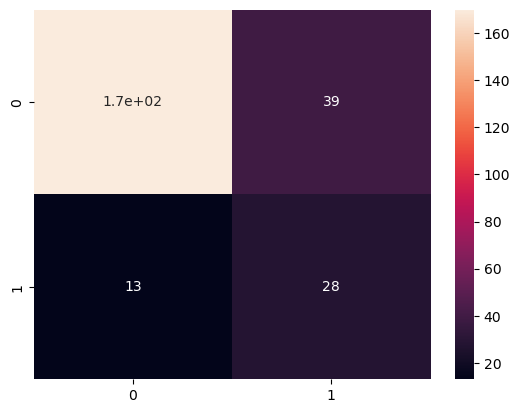

In [4206]:
sns.heatmap(c_matrix,annot=True)

In [4207]:
# with all columns in minmax

# 0 = 3e+02
# 1 = 23

In [4208]:
# with all columns in StandardScaler

# 0 = 3e+02
# 1 = 25

In [4209]:
#dropped 2 unnessory columns in StandardScaler

# 0 = 3e+02
# 1 = 25

## Decision Tree

In [4210]:
tree=DecisionTreeClassifier(max_depth=5)
tree.fit(x_train_sm,y_train_sm)

DecisionTreeClassifier(max_depth=5)

In [4211]:
y_pred=tree.predict(x_test)

In [4212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       163
           1       0.46      0.35      0.40        37

    accuracy                           0.81       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.79      0.81      0.79       200



In [4213]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

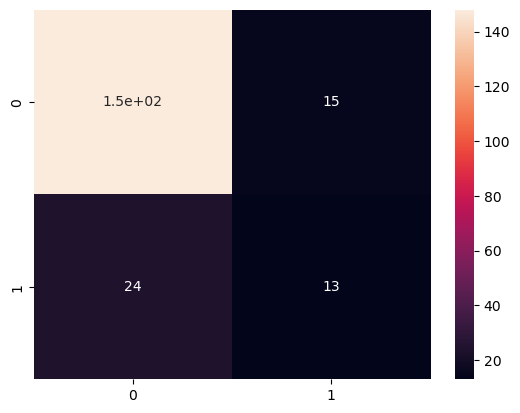

In [4214]:
sns.heatmap(c_matrix,annot=True)

## Random Forest

In [4215]:
random=RandomForestClassifier()
random.fit(x_train_sm,y_train_sm)

C:\Users\ISF\AppData\Local\Temp\ipykernel_18196\812339744.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random.fit(x_train_sm,y_train_sm)


RandomForestClassifier()

## Using function 

In [4216]:
class_report,confusion=get_test_report(random)

In [4217]:
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       183
           1       0.32      0.71      0.44        17

    accuracy                           0.85       200
   macro avg       0.65      0.78      0.68       200
weighted avg       0.91      0.85      0.87       200



In [4218]:
confusion

array([[158,  25],
       [  5,  12]], dtype=int64)

<Axes: >

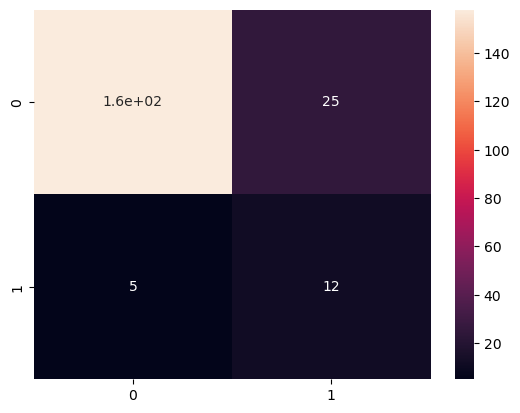

In [4219]:
sns.heatmap(confusion,annot=True)

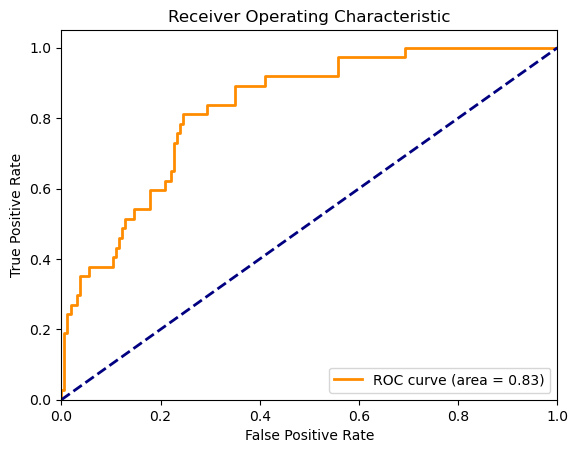

In [4220]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Normal Method

In [4221]:
y_pred=random.predict(x_test)

In [4222]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       163
           1       0.71      0.32      0.44        37

    accuracy                           0.85       200
   macro avg       0.78      0.65      0.68       200
weighted avg       0.83      0.85      0.83       200



In [4223]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

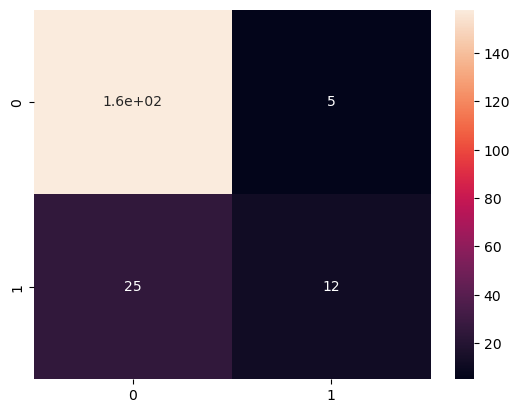

In [4224]:
sns.heatmap(c_matrix,annot=True)

In [4225]:
# fpr,tpr,auc_score=fpr_tpr(random)

In [4226]:
y_proba=random.predict_proba(x_test)[:,1]

In [4227]:
fpr,tpr,threshold=roc_curve(y_test,y_proba)

In [4228]:
auc_score=auc(fpr,tpr)

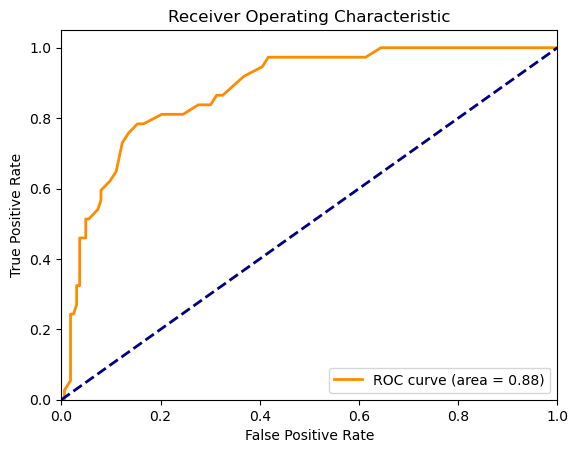

In [4229]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## XGBoost

In [4230]:
xgb=XGBClassifier()
xgb.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [4231]:
y_pred=xgb.predict(x_test)

In [4232]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       163
           1       0.67      0.32      0.44        37

    accuracy                           0.84       200
   macro avg       0.76      0.64      0.67       200
weighted avg       0.83      0.84      0.82       200



In [4233]:
c_matrix=confusion_matrix(y_test,y_pred)

<Axes: >

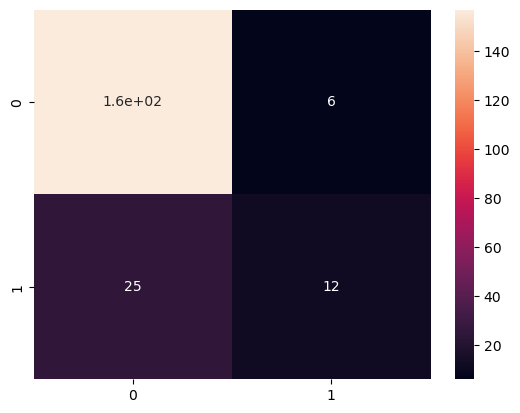

In [4234]:
sns.heatmap(c_matrix,annot=True)

In [4235]:
y_proba=xgb.predict_proba(x_test)[:,1]

In [4236]:
fpr,tpr,threshold=roc_curve(y_test,y_proba)

In [4237]:
auc_score=auc(fpr,tpr)

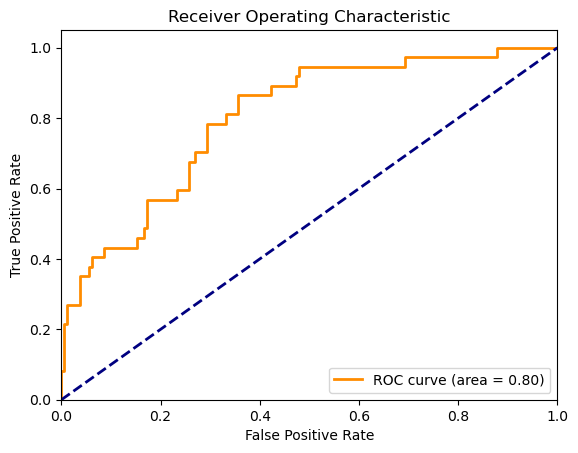

In [4238]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## ADA Boost Classifier

In [4239]:
ada=AdaBoostClassifier(logi)
param={'learning_rate':[1.0,1.2,1.3,1.4,1.5,1.6,1.7,2.0,2.5,3.0]}
k_fold=KFold(shuffle=True,n_splits=10)
grid=GridSearchCV(ada,param_grid=param,cv=k_fold)

In [4240]:
ada_model=grid.fit(x_train_sm,y_train_sm)

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ISF\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [4241]:
ada_model.best_params_

{'learning_rate': 1.0}

In [4242]:
ada_model.best_score_

0.8360530679933664

In [4243]:
class_report,confusion=get_test_report(ada_model)

In [4244]:
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       144
           1       0.76      0.50      0.60        56

    accuracy                           0.81       200
   macro avg       0.79      0.72      0.74       200
weighted avg       0.81      0.81      0.80       200



In [4245]:
confusion

array([[135,   9],
       [ 28,  28]], dtype=int64)

## Normal Method

In [4246]:
y_pred=ada_model.predict(x_test)

In [4247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       163
           1       0.50      0.76      0.60        37

    accuracy                           0.81       200
   macro avg       0.72      0.79      0.74       200
weighted avg       0.86      0.81      0.83       200



In [4248]:
c_matrix=confusion_matrix(y_test,y_pred)
c_matrix

array([[135,  28],
       [  9,  28]], dtype=int64)

<Axes: >

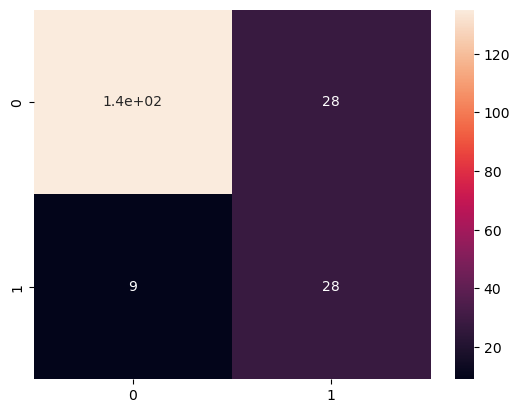

In [4249]:
sns.heatmap(c_matrix,annot=True)

In [4250]:
fpr,tpr,auc_score=fpr_tpr(ada_model)

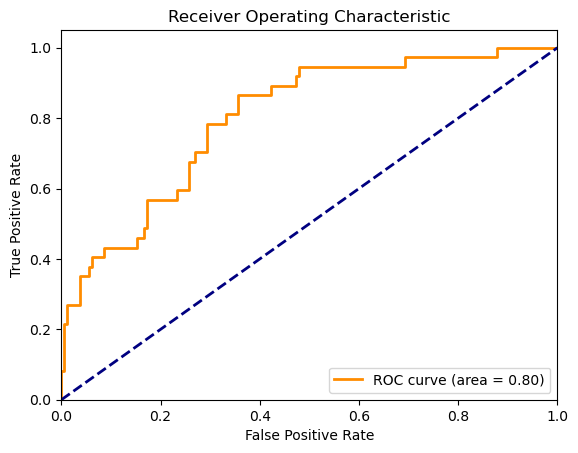

In [4251]:
plt.figure()
plt.plot(fpr,tpr,color='darkorange', lw=2,label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [4252]:

from tensorflow import keras
from keras.models import Model
from keras.layers import MaxPooling2D,Dense,Dropout,Add
from keras import Sequential,layers

In [4253]:
input_size=x_train_sm.shape[1]
input_size

196

In [4254]:
ann_model=Sequential()

ann_model.add(Dense(units=100,activation='relu',input_dim=input_size))
ann_model.add(Dropout(rate=(0.2)))
ann_model.add(Dense(units=60,activation='relu'))
ann_model.add(Dropout(rate=(0.1)))
ann_model.add(Dense(units=30,activation='relu'))
ann_model.add(Dropout(rate=(0.1)))
ann_model.add(Dense(units=20,activation='relu'))
ann_model.add(Dropout(rate=(0.1)))
ann_model.add(Dense(units=1,activation='sigmoid'))

In [4255]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [4256]:
ann_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 100)               19700     
                                                                 
 dropout_58 (Dropout)        (None, 100)               0         
                                                                 
 dense_75 (Dense)            (None, 60)                6060      
                                                                 
 dropout_59 (Dropout)        (None, 60)                0         
                                                                 
 dense_76 (Dense)            (None, 30)                1830      
                                                                 
 dropout_60 (Dropout)        (None, 30)                0         
                                                                 
 dense_77 (Dense)            (None, 20)              

In [4257]:
x_train_sm.shape,y_train_sm.shape

((1342, 196), (1342, 1))

In [4258]:
ann_model.fit(x_train_sm,y_train_sm,batch_size=32,epochs=100,validation_split=0.20)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 0.6209 - accuracy: 0.6375 - val_loss: 0.6847 - val_accuracy: 0.5874
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8183 - val_loss: 0.4252 - val_accuracy: 0.8141
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8695 - val_loss: 0.3251 - val_accuracy: 0.8625
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9040 - val_loss: 0.1917 - val_accuracy: 0.9331
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9301 - val_loss: 0.1406 - val_accuracy: 0.9554
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.9459 - val_loss: 0.0956 - val_accuracy: 0.9851
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.1059 - accuracy: 0.9692 - val_loss: 0.0628 - val_accuracy: 0.9851
Epoch 8/100
3

34/34 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9963 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 59/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9963 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 60/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 6.7222e-04 - val_accuracy: 1.0000
Epoch 61/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9963 - val_loss: 7.1142e-04 - val_accuracy: 1.0000
Epoch 62/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 63/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 8.6659e-04 - val_accuracy: 1.0000
Epoch 64/100
34/34 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 6

In [4259]:
history=ann_model.history.history
accuracy_history=ann_model.history.history

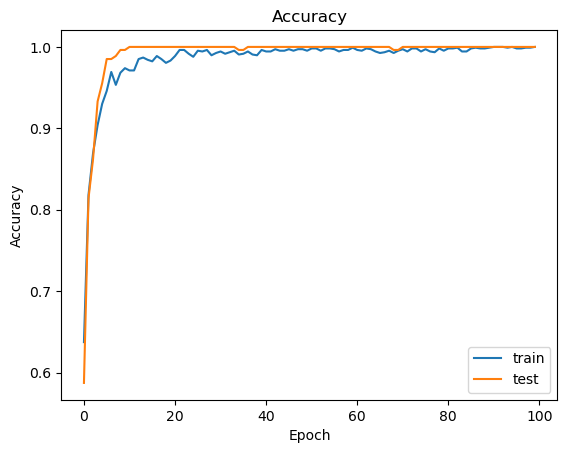

In [4260]:
plt.title('Accuracy')
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'])

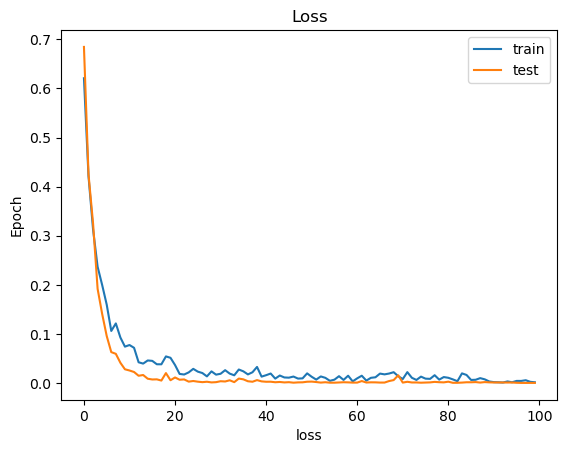

In [4261]:

plt.title('Loss')
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('loss')
plt.ylabel('Epoch')
plt.legend(['train','test'])

In [4262]:
# ann_model_pipeline=make_pipeline(pipe,ann_model)

In [4263]:
# y_pred_ann=ann_model_pipeline.predict(x_test_preprocess)
y_pred_ann=ann_model.predict(x_test)

7/7 [==============================] - 0s 849us/step


In [4264]:
y_pred_ann=[1 if pred>=0.5 else 0 for pred in y_pred_ann]
y_pred_ann

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [4265]:
# y_test.shape,y_pred_ann.shape

In [4266]:
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       163
           1       0.65      0.35      0.46        37

    accuracy                           0.84       200
   macro avg       0.76      0.65      0.68       200
weighted avg       0.83      0.84      0.83       200



In [4267]:
matrix_test=confusion_matrix(y_test,y_pred_ann)
matrix_test

array([[156,   7],
       [ 24,  13]], dtype=int64)

<Axes: >

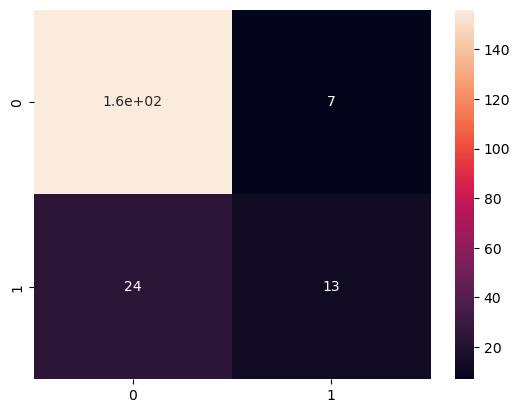

In [4268]:
sns.heatmap(matrix_test,annot=True)

In [4269]:
## Saving this the ann model

# filename='ann_model_pipeline.pkl'
# with open (filename,'wb') as file:
#     pkl.dump(ann_model_pipeline,file)